Dado a base de dados: https://www.kaggle.com/harrywang/wine-dataset-for-clustering


# Aplicar K-means com a quantidade ideial de cluster "k" para um par de atributos aleatório. Como sugestão, avaliar os atributos com melhor separação no gráfico de matriz scatter

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random
from sklearn.preprocessing import StandardScaler

In [ ]:
# Carregar os dados
from google.colab import drive
from google.colab import files
#upload = files.upload()
data = pd.read_csv('/content/wine-clustering.csv')

In [ ]:
#Check the dataset
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Selecionar um par de atributos aleatórios

def selecionar_atributo_aleatorio(atributos_selecionados=[]):
    atributos = list(data.columns)

    # Remover atributos já selecionados
    atributos_disponiveis = [atributo for atributo in atributos if atributo not in atributos_selecionados]
    
    if len(atributos_disponiveis) == 0:
        raise ValueError("Todos os atributos já foram selecionados.")
    atributo_aleatorio = random.choice(atributos)
    return str(atributo_aleatorio)

at1 = selecionar_atributo_aleatorio()
atributo1 = data[selecionar_atributo_aleatorio()]
at2 = selecionar_atributo_aleatorio(atributo1)#add os atributos jáselecionados para não haver repetição
atributo2 = data[selecionar_atributo_aleatorio(atributo1)] #add os atributos jáselecionados para não haver repetição

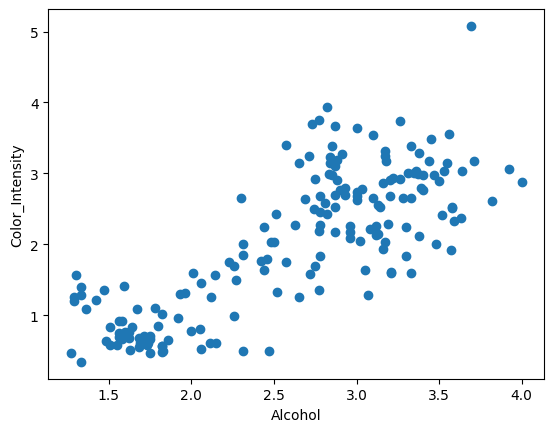

In [ ]:
# Visualizar o scatter plot dos atributos selecionados
plt.scatter(atributo1, atributo2)
plt.xlabel(at1)
plt.ylabel(at2)
plt.show()

In [ ]:
# Converter os atributos selecionados em um array numpy
X = np.array([atributo1, atributo2]).T

In [ ]:
# Definir o número de clusters (k) para o K-means no par de atributos
k = 3

In [ ]:
# Criar uma instância do modelo K-means
kmeans = KMeans(n_clusters=k)

In [ ]:
# Treinar o modelo K-means
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# Obter as labels de cluster para cada ponto de dado
labels = kmeans.labels_

In [ ]:
# Obter as coordenadas dos centroides
centroids = kmeans.cluster_centers_

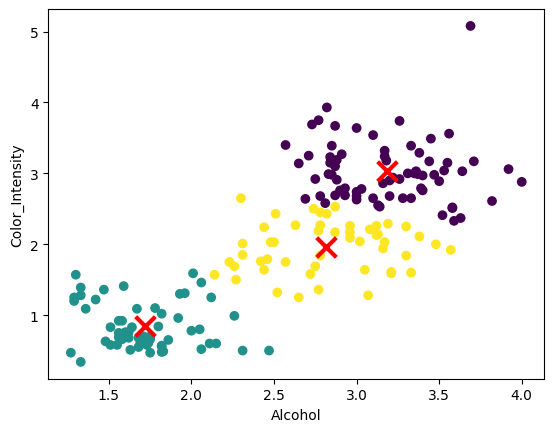

In [ ]:
# Plotar o scatter plot com os clusters
plt.scatter(atributo1, atributo2, c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.xlabel(at1)
plt.ylabel(at2)
plt.show()

# Refazer os experimentos com todos atributos e utilizando a técnica PCA com dois componentes

In [ ]:
# Utilizar todos os atributos e aplicar PCA com dois componentes
atributos = data.columns 
X = data[atributos]

In [ ]:
#normalizar os atributos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Aplicar PCA com dois componentes
pca = PCA(n_components=2)
atributos_reduzidos = pca.fit_transform(X_scaled)

In [ ]:
# Obtém as proporções de variância explicadas pelos componentes
variance_ratios = pca.explained_variance_ratio_

# Obtém os nomes dos atributos originais
nomes_atributos = np.array(atributos)
# Imprime os atributos escolhidos e as proporções de variância explicadas
for i, (atributo, variancia) in enumerate(zip(nomes_atributos, variance_ratios)):
    print(f"Atributo {i+1}: {atributo} - Variância explicada: {variancia:.2f}")


Atributo 1: Alcohol - Variância explicada: 0.36
Atributo 2: Malic_Acid - Variância explicada: 0.19


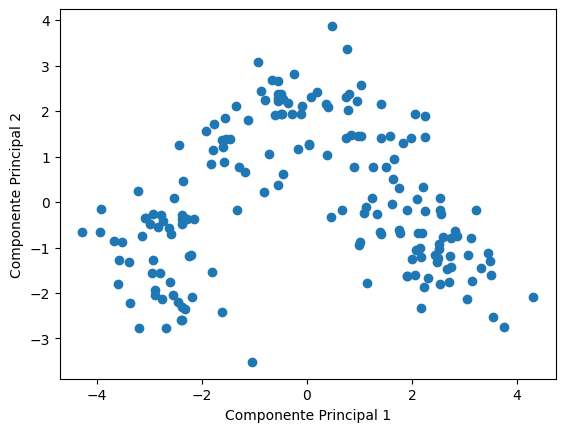

In [ ]:
# Visualizar o scatter plot dos atributos reduzidos
plt.scatter(atributos_reduzidos[:, 0], atributos_reduzidos[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [ ]:
# Definir o número de clusters (k) para o K-means com PCA
k = 3

In [ ]:
# Criar uma instância do modelo K-means
kmeans = KMeans(n_clusters=k)

In [ ]:
# Treinar o modelo K-means com os atributos reduzidos
kmeans.fit(atributos_reduzidos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# Obter as labels de cluster para cada ponto de dado
labels = kmeans.labels_

In [ ]:
# Obter as coordenadas dos centroides
centroids = kmeans.cluster_centers_

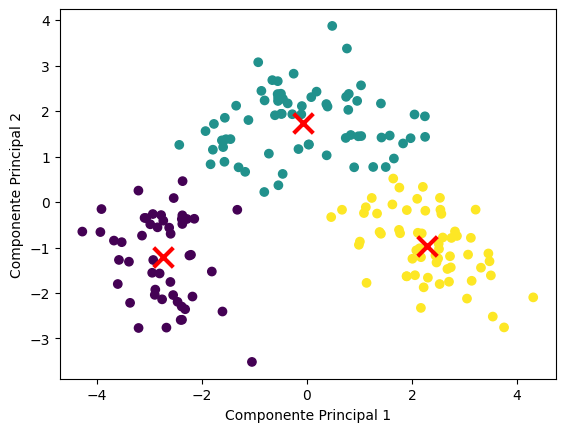

In [ ]:
# Plotar o scatter plot com os clusters
plt.scatter(atributos_reduzidos[:, 0], atributos_reduzidos[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()